### Anirban Saikia
### Covid 19 Analysis

Section 1: COVID19 dataset & Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
covid_dataset = pd.read_csv("covid19_Confirmed_dataset.csv")
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
covid_dataset.shape

(266, 104)

In [6]:
covid_dataset.drop(['Lat','Long'], axis=1, inplace=True)
covid_dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
covid_aggregated = covid_dataset.groupby('Country/Region').sum()

In [8]:

covid_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
covid_aggregated.shape

(187, 100)

Visualizing the pre-processed data for India, China & US countries

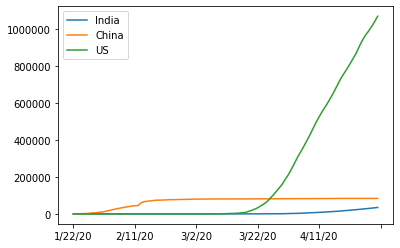

In [10]:

covid_aggregated.loc['India'].plot()
covid_aggregated.loc['China'].plot()
covid_aggregated.loc['US'].plot()
plt.legend()

Section 2: Finding a good Measure

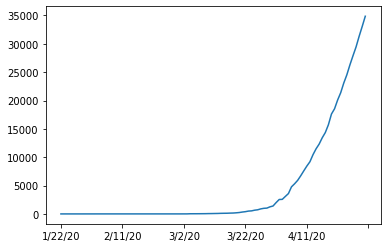

In [11]:
covid_aggregated.loc['India'].plot()

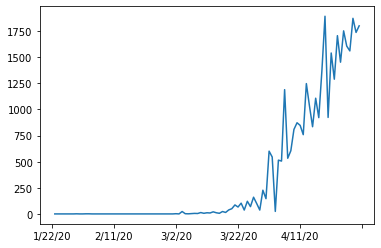

In [12]:

covid_aggregated.loc['India'].diff().plot()

In [13]:

covid_aggregated.loc['India'].diff().max()

1893.0

In [14]:
covid_aggregated.loc['China'].diff().max()

15136.0

In [15]:
covid_aggregated.loc['US'].diff().max()

36188.0

Calculating the maximum ‘Infection Rate’ for each country and storing it in a new column named
‘max_infection_rate’


In [16]:
countries = list(covid_aggregated.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(covid_aggregated.loc[country].diff().max())
covid_aggregated['Maximum Infection Rate'] = max_infection_rates

In [17]:
covid_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Maximum Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


Creating a New Data Frame name ‘Corona Data’ with ‘Country/Region’ as an index and
‘max_infection_rate’ as a column


In [18]:
covid_data = pd.DataFrame(covid_aggregated['Maximum Infection Rate'])
covid_data

,Maximum Infection Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


Section 3: World happiness report dataset

In [19]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [20]:
happiness_report.shape

(156, 9)

In [21]:
columns_to_drop = ['Overall rank','Score','Generosity','Perceptions of corruption']


In [22]:
happiness_report.drop(columns_to_drop, axis=1, inplace=True)


In [23]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [24]:
happiness_report.set_index('Country or region', inplace=True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Covid 19 final dataset

In [25]:
covid_data.head()

,Maximum Infection Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


Happiness Report Final Dataset

In [26]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Creating a DataFrame named ‘data’ by merging ‘happiness_report’ with ‘Corona Data’ and findind
correlation among all variable

In [27]:
data = happiness_report.join(covid_data).copy()
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum Infection Rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


In [28]:
data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum Infection Rate
GDP per capita,1.000000,0.754906,0.835462,0.379079,0.250118
Social support,0.754906,1.000000,0.719009,0.447333,0.191958
Healthy life expectancy,0.835462,0.719009,1.000000,0.390395,0.289263
Freedom to make life choices,0.379079,0.447333,0.390395,1.000000,0.078196
Maximum Infection Rate,0.250118,0.191958,0.289263,0.078196,1.000000


Section4: Visualize our results using Seaborn

In [29]:

data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum Infection Rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


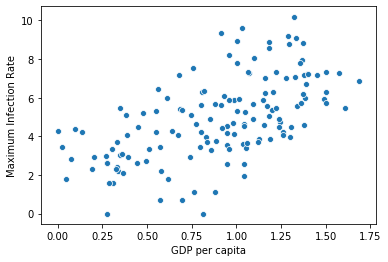

In [35]:
x = data['GDP per capita']
y = data['Maximum Infection Rate']
sns.scatterplot(x,np.log(y));

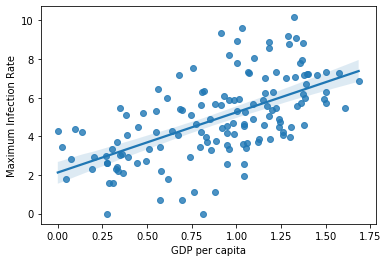

In [36]:
sns.regplot(x,np.log(y));

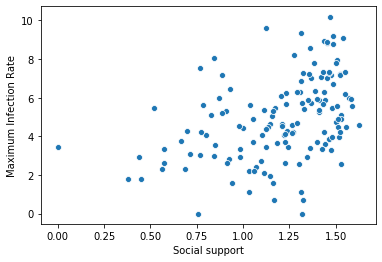

In [37]:
x = data['Social support']
y = data['Maximum Infection Rate']
sns.scatterplot(x,np.log(y));

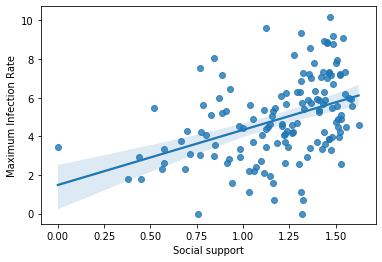

In [39]:
sns.regplot(x,np.log(y));

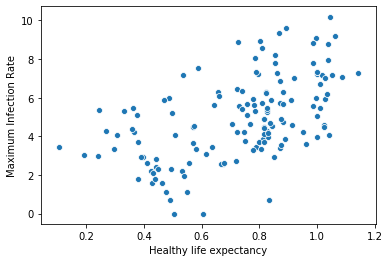

In [41]:
x = data['Healthy life expectancy']
y = data['Maximum Infection Rate']
sns.scatterplot(x,np.log(y));

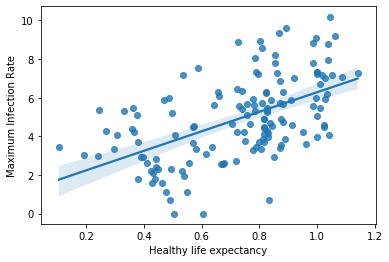

In [42]:
sns.regplot(x,np.log(y));

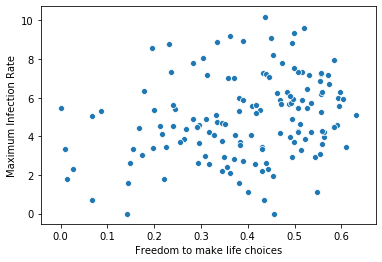

In [43]:
x = data['Freedom to make life choices']
y = data['Maximum Infection Rate']
sns.scatterplot(x,np.log(y));

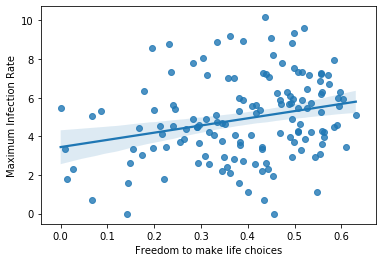

In [44]:
sns.regplot(x,np.log(y));

### CONCLUSION

Thus after doing the data analysis,in the light of the above I came to know that people living in developed countries are  getting highly infected by the Corona virus as compared to those living in developing and underdeveloped countries. This is mainly due to lack of Corona tests and less health facilicities in the developing or underdeveloped countries.In order to prove that this is not the case, we can perform similar analysis on dataset related to cumulative number of deaths.